### Deep Learning With Keras

In [4]:
from __future__ import print_function #ensure compatibility of in python versions
import numpy as np
from keras.datasets import mnist #hand written digits 0-9
from keras.models import Sequential # linear stack of layers
from keras.layers.core import Dense, Activation #A dense layer is a layer of neuron in a neural network
from keras.optimizers import SGD
from keras.utils import np_utils #Provides a scope that changes to _GLOBAL_CUSTOM_OBJECTS cannot escape.
np.random.seed(1671) # for reproducibility
# network and training
NB_EPOCH = 200 #epochs: This is the number of times the model is exposed to the training set. At each iteration, the
#optimizer tries to adjust the weights so that the objective function is minimized.
BATCH_SIZE = 128 #batch_size: This is the number of training instances observed before the optimizer performs 
#a weight update.
VERBOSE = 1 #By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

#verbose=0 will show you nothing (silent)

#verbose=1 will show you an animated progress bar like "progress bar"
#verbose=2 will just mention the number of epoch like this:

NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = SGD() # SGD optimizer
N_HIDDEN = 128 # number of hidden layers
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
# data: shuffled and split between train and test sets
#
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32') #for supporting GPU computation and normalized to [0, 1]
X_test = X_test.astype('float32')
# normalize
#
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES) #In addition, the true labels are loaded into 
#Y_train and Y_test respectively and perform a one-hot encoding on them
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

60000 train samples
10000 test samples


In [5]:
#Y_train
#X_train, y_train), (X_test, y_test) = mnist.load_data()
#y_train

In [6]:
f

NameError: name 'f' is not defined

4


TypeError: Invalid shape (784,) for image data

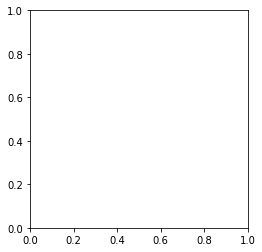

In [7]:

import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 2222 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(X_train[image_index], cmap='Greys')
#plt.show()

In [ ]:
plt.imshow

NameError: name 'model' is not defined

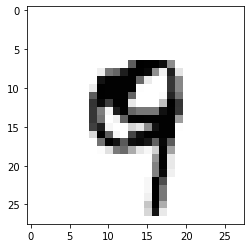

In [8]:
image_index = 4444
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, img_rows, img_cols, 1))
print(pred.argmax())


In [9]:
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [10]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(1671) # for reproducibility
# network and training
NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = SGD() # SGD optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
# data: shuffled and split between train and test sets
#
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
#
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

60000 train samples
10000 test samples


In [11]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [12]:
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 2s 40us/step - loss: 1.3633 - accuracy: 0.6796 - val_loss: 0.8904 - val_accuracy: 0.8246
Epoch 2/200
48000/48000 [==============================] - 1s 25us/step - loss: 0.7913 - accuracy: 0.8272 - val_loss: 0.6572 - val_accuracy: 0.8546
Epoch 3/200
48000/48000 [==============================] - 1s 25us/step - loss: 0.6436 - accuracy: 0.8497 - val_loss: 0.5625 - val_accuracy: 0.8681
Epoch 4/200
48000/48000 [==============================] - 1s 26us/step - loss: 0.5717 - accuracy: 0.8602 - val_loss: 0.5098 - val_accuracy: 0.8765
Epoch 5/200
48000/48000 [==============================] - 1s 28us/step - loss: 0.5276 - accuracy: 0.8677 - val_loss: 0.4758 - val_accuracy: 0.8826
Epoch 6/200
48000/48000 [==============================] - 2s 36us/step - loss: 0.4973 - accuracy: 0.8726 - val_loss: 0.4515 - val_accuracy: 0.8866
Epoch 7/200
47488/48000 [============================>.] - ET

KeyboardInterrupt: 

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
array = [np.random.rand(2,4)]

In [ ]:
print(type(array))

In [ ]:
array2 = np.array(array)

In [ ]:
print(type(array2))

In [ ]:
array

In [ ]:
print(array2.shape)

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

In [ ]:
a = tf.constant(6)
b = tf.constant(4)
multiply = tf.multiply(a,b)

In [ ]:
multiply

In [ ]:
sess = tf.function()

In [ ]:
tf.function()

In [ ]:
def f(x, y):
  return tf.reduce_mean(tf.multiply(x ** 2, 3) + y)

g = tf.function(f)

x = tf.constant([[2.0, 3.0]])
y = tf.constant([[3.0, -2.0]])

In [ ]:
g = tf.function(f)

In [ ]:
print(g)

In [ ]:
 #Tensors and tf.Variables used by the Python function are captured in the
# graph.
@tf.function
def h():
      return f(x, y)

assert (h().numpy() == f(x, y).numpy()).all()

In [ ]:
sess = tf.In